In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql.functions import *
from pyspark.sql.types import *

import calendar
import csv
import os
from io import StringIO

Data Cleaning

In [0]:
def preprocessorDF(file_name=None):
    if file_name is None:
        file_name = input('Kindly enter the file you wish to clean: ')
    
    # Read the file into an RDD
    rdd = sc.textFile(f'FileStore/tables/{file_name}')
    sample_line = rdd.first()
    
    # Check for '|' or '\t' delimiter
    if '|' in sample_line:
        delimiter = '|'
        rdd_pipeline = rdd.map(lambda line: line.replace(',,','').replace('"','')).map(lambda x: x.split(delimiter))
    elif '\t' in sample_line:
        delimiter = '\t'
        rdd_pipeline = rdd.map(lambda line: line.replace(',,','').replace('"','')).map(lambda x: x.split(delimiter))

        #Adjust the length of each row in an RDD to a specified length by appending None values to the row until it reaches the desired length
        def adjust_row_length(row, length):
            return row + ([None] * (length - len(row)))
        rdd_pipeline = rdd_pipeline.map(lambda row: adjust_row_length(row, 14))
    else:
        delimiter = rdd.map(lambda row: next(csv.reader(StringIO(row))))
        rdd_pipeline = delimiter.map(lambda row: [item.strip('"') for item in row])
    
    # Replace missing values with 'NA' in each row of the RDD
    rdd_pipeline = rdd_pipeline.map(lambda row: ['NA' if value is None or value == '' else value for value in row])
       
    # Convert RDD to DataFrame
    header = rdd_pipeline.first()
    data= rdd_pipeline.filter(lambda x: x != header)
    dataFrame = spark.createDataFrame(data, schema= header)
    return dataFrame


In [0]:
#read all files to objects
clinical2020= preprocessorDF('clinicaltrial_2020.csv')
clinical2021= preprocessorDF('clinicaltrial_2021.csv')
clinical2023= preprocessorDF('clinicaltrial_2023.csv')
pharmaData= preprocessorDF('pharma.csv')

In [0]:
#pick any of the new variables to show results
clinical2021.display()

Id Sponsor Status Start Completion Type Submission Conditions Interventions NCT02758028 The University of Hong Kong Recruiting Aug 2005 Nov 2021 Interventional Apr 2016 NA NA NCT02751957 Duke University Completed Jul 2016 Jul 2020 Interventional Apr 2016 Autistic Disorder,Autism Spectrum Disorder NA NCT02758483 Universidade Federal do Rio de Janeiro Completed Mar 2017 Jan 2018 Interventional Apr 2016 Diabetes Mellitus NA NCT02759848 Istanbul Medeniyet University Completed Jan 2012 Dec 2014 Observational May 2016 Tuberculosis,Lung Diseases,Pulmonary Disease NA NCT02758860 University of Roma La Sapienza Active, not recruiting Jun 2016 Sep 2020 Observational [Patient Registry] Apr 2016 Diverticular Diseases,Diverticulum,Diverticulosis NA NCT02757209 Consorzio Futuro in Ricerca Completed Apr 2016 Jan 2018 Interventional Apr 2016 Asthma Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate NCT02752438 Ankara University Unknown status May 2016 Jul 2017 Observational [Patient Registry] Apr 2016 Hypoventilation NA NCT02753543 Ruijin Hospital Unknown status Nov 2015 Nov 2019 Interventional Apr 2016 Lymphoma NA NCT02757508 Washington University School of Medicine Completed Mar 2016 Jul 2017 Interventional Apr 2016 NA Vitamins NCT02753530 Orphazyme Completed Aug 2017 Jan 2021 Interventional Apr 2016 Myositis NA NCT02754817 Novo Nordisk A/S Completed Apr 2016 Oct 2016 Observational Apr 2016 Diabetes Mellitus Liraglutide,Xultophy NCT02759276 Daniel Alexandre Bottino Completed May 2015 Dec 2015 Observational Apr 2016 Hypertension NA NCT02750956 Bulent Ecevit University Completed Jun 2015 Mar 2016 Observational Apr 2016 Periodontal Diseases NA NCT02752113 Institut für Pharmakologie und Präventive Medizin Completed Apr 2016 May 2019 Interventional Apr 2016 Diabetes Mellitus Metformin,Empagliflozin,Linagliptin NCT02752698 The Third Xiangya Hospital of Central South University Active, not recruiting Jan 2015 Dec 2021 Interventional Jun 2015 Appendicitis,Stomach Ulcer,Cholecystolithiasis,Cholelithiasis,Gallstones NA NCT02755779 Tel Aviv Medical Center Unknown status Jun 2016 Jun 2017 Observational Apr 2016 NA NA NCT02750384 Medicines for Malaria Venture Terminated May 2016 Jul 2016 Interventional Apr 2016 NA NA NCT02754609 James Cook University, Queensland, Australia Completed Sep 2016 Oct 2019 Interventional Apr 2016 Hookworm Infections,Celiac Disease NA NCT02755701 Soonchunhyang University Hospital Unknown status Jul 2016 Dec 2018 Interventional Apr 2016 Ascites NA NCT02751762 Member Companies of the Opioid PMR Consortium Recruiting Nov 2017 Oct 2022 Observational Apr 2016 Chronic Pain,Substance-Related Disorders,Opioid-Related Disorders,Narcotic-Related Disorders,Behavior NA NCT02756299 Marmara University Completed Jun 2014 Apr 2015 Interventional Apr 2016 Sleep Apnea Syndromes,Sleep Apnea NA NCT02750709 Cycle Pharmaceuticals Ltd. Completed Oct 2015 Jan 2016 Interventional Apr 2016 Tyrosinemias Nitisinone NCT02753907 Yonsei University Completed Jun 2015 NA Interventional Apr 2016 NA NA NCT02755467 Cutera Inc. Completed May 2016 Apr 2017 Interventional Apr 2016 Hemangioma NA NCT02755298 University of Zurich Completed Oct 2016 Nov 2020 Interventional Mar 2016 Hypertension Acetazolamide NCT02759614 Guangdong Association of Clinical Trials Unknown status Apr 2016 Jun 2019 Interventional Mar 2016 Carcinoma Bevacizumab,Erlotinib Hydrochloride NCT02752815 Ruijin Hospital Unknown status Apr 2016 Jun 2020 Interventional Apr 2016 Lymphoma Prednisone,Cyclophosphamide,Rituximab,Vincristine,Epirubicin NCT02757131 The Cleveland Clinic Completed Jul 2016 Jul 2017 Interventional Apr 2016 Iatrogenic Disease NA NCT02758704 St. Justine's Hospital Completed Oct 2015 Jun 2021 Interventional Apr 2016 NA NA NCT02750501 Alcresta Therapeutics, Inc. Completed Jul 2016 Mar 2017 Interventional Apr 2016 Cystic Fibrosis,Fibrosis NA NCT02759913 Iron Horse Diagnostics, Inc. Unknown status Jan 2015 Dec 2016 Observational Apr 2016 Motor Neuron Disease,Amyotro

In [0]:
def distinctDFCounter(columnName, DfFile):
    # Count the distinct values in the specified column
    distinct_count = DfFile.select(columnName).distinct().count()
    
    return print(f'The total Count of Study is {distinct_count}')

In [0]:
# Example usage:
distinctDFCounter("Study Title", clinical2023)
distinctDFCounter("Id", clinical2021)

The total Count of Study is 481102
The total Count of Study is 387261


In [0]:
def types_countsDF(columnName, DataFrame):
    # Count the occurrences of each value
    counts = DataFrame.groupBy(columnName).count()

    # Sort the counts in descending order
    sorted_counts = counts.orderBy("count", ascending=False)

    # Display the sorted counts
    sorted_counts.display()


In [0]:
types_countsDF('Type', clinical2023)

Type count INTERVENTIONAL 371382 OBSERVATIONAL 110221 EXPANDED_ACCESS 928 NA 891

Databricks visualization. Run in Databricks to view.

In [0]:
#validation
types_countsDF('Type', clinical2020)

Type count Interventional 277631 Observational 71434 Observational [Patient Registry] 7332 Expanded Access 69

In [0]:
def top_conditons(delimiter, DataFrame):
    DataFrame= DataFrame.select(explode(split(DataFrame['Conditions'], f'{delimiter}')).alias('Conditions'))
    DataFrame= DataFrame.where(DataFrame['Conditions'] != 'NA')
    DataFrame= DataFrame.groupBy('Conditions').count()
    DataFrame= DataFrame.orderBy('count', ascending= False)
    DataFrame= DataFrame.limit(5)

    #show Result
    print('Top 5 Condition of clinical Trials are:')
    DataFrame.show(truncate= False)
    #visualize results
    plot_data= DataFrame.toPandas()
    plt.title('Top Five Study Conditions')
    sns.barplot(x= 'Conditions', y= 'count', data= plot_data, palette= 'Set1')
    plt.xlabel('Conditions')
    plt.ylabel('Counts')
    plt.show()

Top 5 Condition of clinical Trials are:
+-------------+-----+
|Conditions   |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4072 |
|Hypertension |4020 |
+-------------+-----+



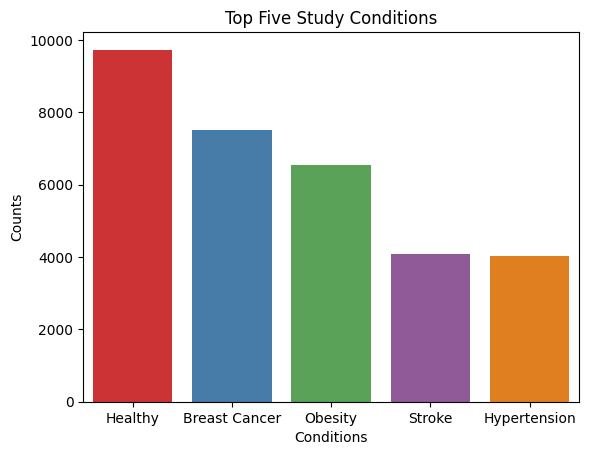

In [0]:
top_conditons('\|', clinical2023)

Top 5 Condition of clinical Trials are:
+-----------------+-----+
|Conditions       |count|
+-----------------+-----+
|Carcinoma        |13389|
|Diabetes Mellitus|11080|
|Neoplasms        |9371 |
|Breast Neoplasms |8640 |
|Syndrome         |8032 |
+-----------------+-----+



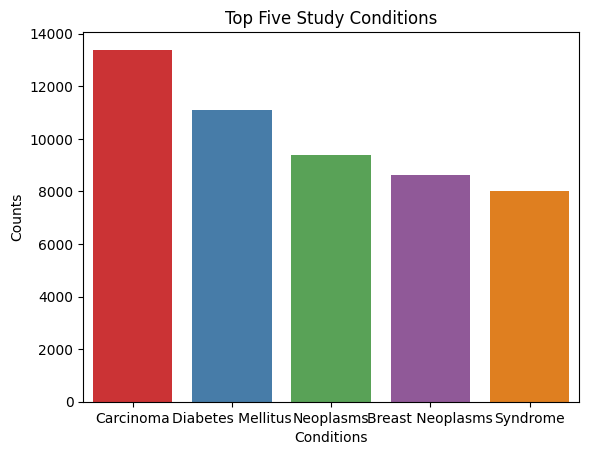

In [0]:
top_conditons(',', clinical2021)

In [0]:

def top_10DF(colName, DataFrame):
    pharmaceutical_companies = []

    for row in pharmaData.select('Parent_Company').distinct().collect():   #here we list out all parent company names
        pharmaceutical_companies.append(row['Parent_Company'])

    DataFrame= DataFrame.where(~col(colName).isin(pharmaceutical_companies)) #filter out parent pharmaceutical names
    sponsors_count = DataFrame.groupBy(colName).count()

    sorted_sponsors= sponsors_count.orderBy('count', ascending=False)  #count grouped names
    top_10_sponsors = sorted_sponsors.limit(10).collect()

    print("Top 10 Non-Pharmaceutical Sponsoring Companies \n") #print
    for row in top_10_sponsors:
        print(f"Sponsor: {row['Sponsor']}, Number of Clinical Trials Sponsored: {row['count']}")

In [0]:
#use case for 2020 Dataset
top_10DF('Sponsor', clinical2023)

Top 10 Non-Pharmaceutical Sponsoring Companies 

Sponsor: National Cancer Institute (NCI), Number of Clinical Trials Sponsored: 3410
Sponsor: Assiut University, Number of Clinical Trials Sponsored: 3335
Sponsor: Cairo University, Number of Clinical Trials Sponsored: 3023
Sponsor: Assistance Publique - Hôpitaux de Paris, Number of Clinical Trials Sponsored: 2951
Sponsor: Mayo Clinic, Number of Clinical Trials Sponsored: 2766
Sponsor: M.D. Anderson Cancer Center, Number of Clinical Trials Sponsored: 2702
Sponsor: Novartis Pharmaceuticals, Number of Clinical Trials Sponsored: 2393
Sponsor: National Institute of Allergy and Infectious Diseases (NIAID), Number of Clinical Trials Sponsored: 2340
Sponsor: Massachusetts General Hospital, Number of Clinical Trials Sponsored: 2263
Sponsor: National Taiwan University Hospital, Number of Clinical Trials Sponsored: 2181


In [0]:
#Validation of function on 2020 dataser
top_10DF('Sponsor', clinical2020)

Top 10 Non-Pharmaceutical Sponsoring Companies 

Sponsor: National Cancer Institute (NCI), Number of Clinical Trials Sponsored: 3100
Sponsor: M.D. Anderson Cancer Center, Number of Clinical Trials Sponsored: 2238
Sponsor: Merck Sharp & Dohme Corp., Number of Clinical Trials Sponsored: 2184
Sponsor: Mayo Clinic, Number of Clinical Trials Sponsored: 2097
Sponsor: Assistance Publique - Hôpitaux de Paris, Number of Clinical Trials Sponsored: 2043
Sponsor: Novartis Pharmaceuticals, Number of Clinical Trials Sponsored: 1962
Sponsor: Massachusetts General Hospital, Number of Clinical Trials Sponsored: 1823
Sponsor: Assiut University, Number of Clinical Trials Sponsored: 1806
Sponsor: Hoffmann-La Roche, Number of Clinical Trials Sponsored: 1761
Sponsor: National Taiwan University Hospital, Number of Clinical Trials Sponsored: 1720


In [0]:
def monthly_study_count(DataFrames, target_year):
    header = DataFrames.first()
    data = DataFrames.filter(col("Status") == "COMPLETED")
    
    if target_year == 2023:
        # Clean 'Completion' column and filter for the year 2023
        completed_studies = data.withColumn('Completion_Month', split(regexp_replace(col('Completion'), ',', ''), '-')[1]) \
                                .filter(col('Completion').contains(str(target_year)))
    else:
        # Filter for the specified year (2020 or 2021) and clean 'Completion' column
        completed_studies = DataFrames.withColumn('Completion', to_date(col('Completion'), 'MMM yyyy')) \
                                      .filter((col('Status') == 'Completed') & (col('Completion').contains(f'{target_year}'))) \
                                      .withColumn('Completion_Month', date_format(col('Completion'), 'MMM'))
    
    # Group by completion month and count studies
    monthly_counts = completed_studies.groupBy('Completion_Month').count().orderBy('Completion_Month').toPandas()


    # Convert month abbreviations to month numbers for sorting
    month_numbers = {month_abbr: i for i, month_abbr in enumerate(calendar.month_abbr) if month_abbr}
    monthly_counts['Month_Num'] = monthly_counts['Completion_Month'].map(month_numbers)

    # Sort by month number
    monthly_counts = monthly_counts.sort_values(by='Month_Num')

    # Plot the results
    plt.figure(figsize=(7, 4))
    sns.barplot(data=monthly_counts, x='Completion_Month', y='count', palette='viridis')
    plt.title(f'Number of Completed Studies for Each Month in {target_year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Studies Completed')
    plt.xticks(range(12), [calendar.month_abbr[i+1] for i in range(12)])  # Convert month numbers to month names
    plt.tight_layout()
    plt.show()

    # Display the table
    print(f"Table of Number of Completed Studies for Each Month in {target_year}:")
    print(monthly_counts[['Completion_Month', 'count']].to_string(index=False))

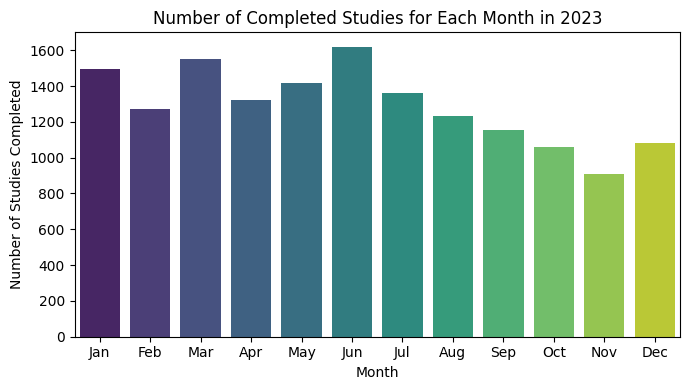

Table of Number of Completed Studies for Each Month in 2023:
Completion_Month  count
              01   1494
              02   1272
              03   1552
              04   1324
              05   1415
              06   1619
              07   1360
              08   1230
              09   1152
              10   1058
              11    909
              12   1082


In [0]:
#test case
monthly_study_count(clinical2023, 2023)

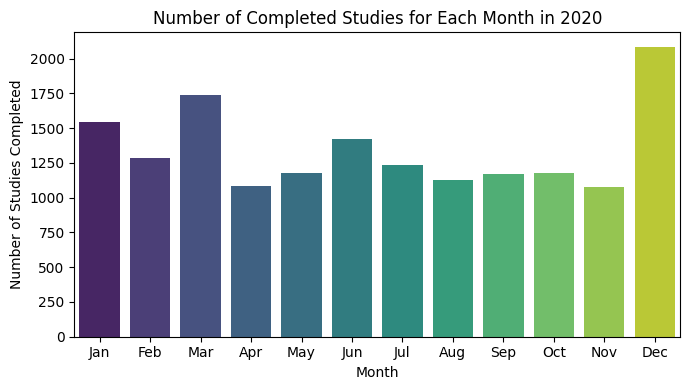

Table of Number of Completed Studies for Each Month in 2020:
Completion_Month  count
             Jan   1544
             Feb   1286
             Mar   1740
             Apr   1080
             May   1176
             Jun   1424
             Jul   1237
             Aug   1126
             Sep   1167
             Oct   1176
             Nov   1078
             Dec   2084


In [0]:
#test case or validation
monthly_study_count(clinical2020, 2020)

Status Count SUSPENDED 1644 APPROVED_FOR_MARKETING 197 ENROLLING_BY_INVITATION 3937 AVAILABLE 259 NO_LONGER_AVAILABLE 446 UNKNOWN 64813 TERMINATED 28022 NOT_YET_RECRUITING 20098 TEMPORARILY_NOT_AVAILABLE 26 RECRUITING 66158 COMPLETED 263498 WITHDRAWN 13718 ACTIVE_NOT_RECRUITING 19716 WITHHELD 889 INTERVENTIONAL 1

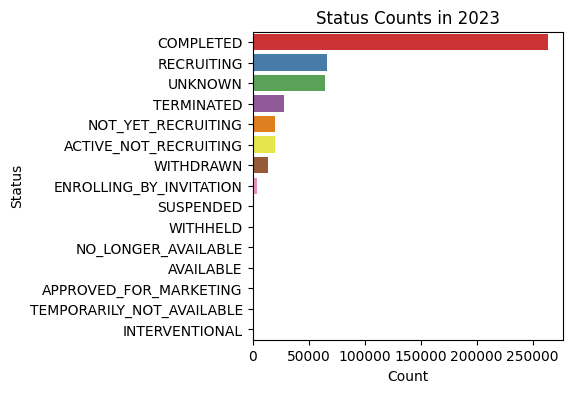

In [0]:
# Step 1: Map each status to a tuple containing (status, 1) and convert to DataFrame
status_count_df = clinical2023.select("Status") \
    .groupBy("Status").count() \
    .withColumnRenamed("count", "Count")

# Step 2: Show the result
status_count_df.display()

# Convert the DataFrame to Pandas DataFrame for visualization
status_count_pd = status_count_df.toPandas()

# Sort the DataFrame by count in descending order
status_count_pd = status_count_pd.sort_values(by='Count', ascending=False)

# Visualize the status counts using a horizontal bar plot
plt.figure(figsize=(4, 4))
sns.barplot(data=status_count_pd, y='Status', x='Count', palette='Set1')
plt.title('Status Counts in 2023')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()
